In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# 경로 설정 
import os
os.chdir('/content/drive/MyDrive/A2W/데이터')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier

In [9]:
df = pd.read_csv("y_sum_hg_all.csv")

In [10]:
df

,Unnamed: 0,umd,sgg,umd2,sum_cnt,landslide,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
0,0,개진면,고령군,고령군 개진면,0.0,0.0,2,24,306.1,18.7,158.6,3,12,1,1,20,2,1
1,1,성산면,고령군,고령군 성산면,0.0,0.0,2,26,103.2,13.4,244.5,3,12,1,1,10,2,1
2,2,우곡면,고령군,고령군 우곡면,1.0,1.0,2,24,64.1,17.7,285.2,3,7,1,1,10,3,13
3,3,각북면,청도군,청도군 각북면,0.0,0.0,1,12,573.4,22.5,15.5,3,12,1,1,10,2,1
4,4,이서면,청도군,청도군 이서면,0.0,0.0,2,26,249.5,15.1,86.6,3,12,1,1,10,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,632,신안동,진주시,진주시 신안동,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0
633,633,충무공동,진주시,진주시 충무공동,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0
634,634,욕지면,통영시,통영시 욕지면,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0
635,635,사량면,통영시,통영시 사량면,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [23]:
df_sample = df.drop(["Unnamed: 0", 'umd', "sgg", "umd2", "sum_cnt"], axis=1)

In [24]:
df_sample = df_sample.dropna()
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 636
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   landslide   637 non-null    float64
 1   PRRCK_LARG  637 non-null    int64  
 2   PRRCK_MDDL  637 non-null    int64  
 3   LOCTN_ALTT  637 non-null    float64
 4   LOCTN_GRDN  637 non-null    float64
 5   EIGHT_AGL   637 non-null    float64
 6   CLZN_CD     637 non-null    int64  
 7   TPGRP_TPCD  637 non-null    int64  
 8   PRDN_FOM_C  637 non-null    int64  
 9   SLANT_TYP   637 non-null    int64  
 10  SLDPT_TPCD  637 non-null    int64  
 11  SCSTX_CD    637 non-null    int64  
 12  SLTP_CD     637 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 69.7 KB


In [25]:
df_sample.columns

Index(['landslide', 'PRRCK_LARG', 'PRRCK_MDDL', 'LOCTN_ALTT', 'LOCTN_GRDN',
       'EIGHT_AGL', 'CLZN_CD', 'TPGRP_TPCD', 'PRDN_FOM_C', 'SLANT_TYP',
       'SLDPT_TPCD', 'SCSTX_CD', 'SLTP_CD'],
      dtype='object')

In [26]:
df_sample.value_counts("landslide")

landslide
0.0    397
1.0    240
dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df_sample[['PRRCK_LARG', 'PRRCK_MDDL', 'LOCTN_ALTT', 'LOCTN_GRDN',
       'EIGHT_AGL', 'CLZN_CD', 'TPGRP_TPCD', 'PRDN_FOM_C', 'SLANT_TYP',
       'SLDPT_TPCD', 'SCSTX_CD', 'SLTP_CD']], 
    df_sample['landslide'], 
    test_size=0.25, 
    stratify=df_sample['landslide'], 
    random_state=123456)

In [29]:
x_train

,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
265,1,11,357.6,16.1,164.1,2,3,3,2,2,1,2
595,1,11,429.3,34.6,215.8,1,12,6,3,20,1,2
175,2,22,580.0,10.1,151.3,2,12,1,1,10,3,15
181,2,22,211.0,18.6,174.1,2,12,1,1,10,3,15
274,2,24,226.2,13.7,226.7,2,12,1,1,10,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...
498,1,11,136.3,30.5,59.8,4,12,6,3,30,3,2
563,1,11,19.0,0.7,160.6,4,7,5,2,10,1,26
242,2,24,121.4,10.5,208.7,2,7,1,1,10,2,1
426,2,22,65.9,11.4,195.7,4,7,1,1,10,2,1


In [30]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123456,
                       verbose=0, warm_start=False)

In [31]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.727
Mean accuracy score: 0.694


In [32]:
predicted

array([0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 1.])

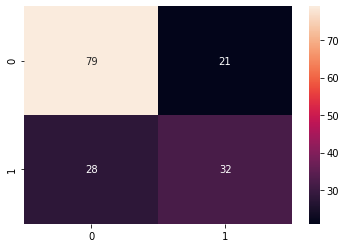

In [33]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)